In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, hstack
import itertools
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.metrics import coverage_error
from sklearn.svm import SVC
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.neural_network import MLPClassifier
import scipy.sparse
from sklearn.metrics import f1_score

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from bs4 import BeautifulSoup

#from sklearn.preprocessing import StandardScaler

from scipy.sparse import coo_matrix, hstack


In [137]:
#Dataset loading
dataset = pd.read_csv('Cleaned_Posts.csv', nrows = None, index_col=0)
dataset.shape

(49399, 10)

In [138]:
#Any np.nan ?
dataset.isnull().sum()

TText             0
TText_NEG         0
PText             0
TCode         10054
PCode          9627
TTitle            0
TTitle_NEG        0
Title             0
PTags             0
Tags              0
dtype: int64

In [139]:
#np.nan cleaning
dataset['TCode'] = dataset['TCode'].fillna('None')
dataset['PCode'] = dataset['PCode'].fillna('None')

In [140]:
#Any np.nan ?
dataset.isnull().sum()

TText         0
TText_NEG     0
PText         0
TCode         0
PCode         0
TTitle        0
TTitle_NEG    0
Title         0
PTags         0
Tags          0
dtype: int64

In [141]:
#Downsampling
dataset = dataset.sample(10000)
dataset.shape

(10000, 10)

In [142]:
dataset.head()

,TText,TText_NEG,PText,TCode,PCode,TTitle,TTitle_NEG,Title,PTags,Tags
Id,,,,,,,,,,
48130055,wish blogger gadget display onli post page par...,wish blogger gadget display onli post page par...,I wish a blogger gadget to be displayed only ...,None,None,googl blogger show widget specif label,googl blogger show widget specif label,Google Blogger - How to show a widget with a s...,"['javascript', 'html', 'css', 'xml', 'blogger']",<javascript><html><css><xml><blogger>
48077014,use storybooks.j want chang state document saw...,use storybooks.j want chang state document saw...,"so I am using storybooks.js, and I want to ch...",https :/ / storybook . js . org / basics / faq...,https://storybook.js.org/basics/faq/ <MyCompon...,storybooks.j modifiy inner state inner http ca...,storybooks.j modifiy inner state inner http ca...,"Storybooks.js modifiying inner state, when an ...","['javascript', 'reactjs', 'storybook']",<javascript><reactjs><storybook>
48162662,tri get video frame filter video two techniqu ...,tri get video frame filter video two techniqu ...,I am trying to get video frame for filtering ...,MediaMetadataRetriever metadataRetriever2 ; me...,MediaMetadataRetriever metadataRetriever2;\nme...,get frame video video filter veri slow get ani...,get frame video video filter veri slow get ani...,Get frame of video for video filter is very sl...,"['android', 'video', 'bitmap', 'video-processi...",<android><video><bitmap><video-processing><and...
48149142,happen n't know wrong code pleas help fix erro...,happen n't know_NEG wrong_NEG code_NEG pleas h...,This is happening and i don't know what is wr...,package com . cryptotracker ; import android ....,package com.cryptotracker;\n\nimport android.a...,except thread `` main '' java.lang.nullpointer...,except thread `` main '' java.lang.nullpointer...,"Exception in thread ""main"" java.lang.NullPoint...","['java', 'android', 'facebook', 'facebook-grap...",<java><android><facebook><facebook-graph-api><...
48122798,'m get follow error messag wrong 'm use python...,'m get follow error messag wrong 'm use python...,But I'm getting the following error message: ...,import sys import os import hashlib file =' / ...,import sys\nimport os\nimport hashlib\n\nfile ...,`` oserror errno invalid argument '' read ing ...,`` oserror errno invalid argument '' read ing ...,"""OSError: [Errno 22] Invalid argument"" when re...","['python', 'python-3.x', 'macos', 'file-io']",<python><python-3.x><macos><file-io>


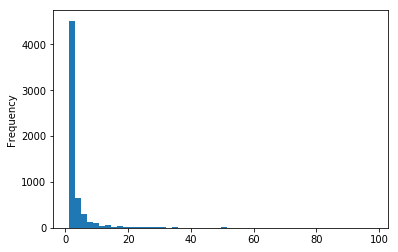

35

In [144]:
#Most commons tags
dataset['PTags'] = dataset['Tags'].apply(lambda x: [tag.name for tag in BeautifulSoup(x, 'html.parser').find_all()])
df = pd.DataFrame(dataset['PTags'].tolist()).stack().value_counts()
df[df<100].plot(kind = 'hist', bins = 50)
plt.show()

popularitytags = df[df>100].to_dict()
len(popularitytags)


In [15]:
dataset

,TText,TText_NEG,PText,TCode,PCode,TTitle,TTitle_NEG,Title,PTags,Tags
Id,,,,,,,,,,
48185430,develop project swift among function need show...,develop project swift among function need show...,I am developing a project in swift 4 and amon...,None,None,firebas storag imag view,firebas storag imag view,firebase / storage / image / view,"[ios, swift, firebase, storage, firebase-storage]",<ios><swift><firebase><storage><firebase-storage>
48141112,mediawiki show link file use result get last m...,mediawiki show link file use result get last m...,"In mediawiki, I can show a link to a file usi...",[[ Media : File . pdf | A file ]],[[Media:File.pdf|A file]]\n,show last modifi date upload file mediawiki,show last modifi date upload file mediawiki,How do you show the last modified date for an ...,[mediawiki],<mediawiki>
48117385,dockerfil essenc first stage build rust binari...,dockerfil essenc first stage build rust binari...,So I have the Dockerfile So in essence the fi...,FROM rust : . . RUN set - x \& & apt - get upd...,FROM rust:1.19.0\nRUN set -x \\n && apt-get...,unabl figur went wrong multi-stag docker build,unabl figur went wrong multi-stag docker build,Unable to figure out where I went wrong in thi...,"[docker, dockerfile]",<docker><dockerfile>
48142517,want plot custom marker top nvd3 chart plot nv...,want plot custom marker top nvd3 chart plot nv...,I want to plot custom marker on top of NVD3 c...,var chart = nv . models . lineChart () . optio...,var chart = nv.models.lineChart()\n .option...,figur scale x valu nvd3 's time format xaxi ad...,figur scale x valu nvd3 's time format xaxi ad...,How to figure out scaled x value on NVD3's tim...,"[d3.js, nvd3.js]",<d3.js><nvd3.js>
48150022,web applic angular.j use rest search api searc...,web applic angular.j use rest search api searc...,We have a web application on angular.js which...,search / user ? q =' abc,search/user?q='abc',show recent search search api,show recent search search api,Showing recent searches from a search API,"[javascript, java, angularjs, rest, web-services]",<javascript><java><angularjs><rest><web-services>
48154289,problem use entiti framework 6.21 orm manag da...,problem use entiti framework 6.21 orm manag da...,Problem: We use entity framework (6.21) as ou...,query_id sys . query_store_query SELECT qStore...,query_id sys.query_store_query SELECT \n ...,queri differ queri queri store,queri differ queri queri store,Same query - different queries in query store,"[sql, sql-server, entity-framework, azure-sql-...",<sql><sql-server><entity-framework><azure-sql-...
48148389,use like follow got need.. code use ng-if cond...,use like follow got need.. code use ng-if cond...,"If i use like following,I got what i need.. H...",< style >. moreMenu { position : absolute ; ri...,<style>\n .moreMenu {\n position: abso...,click function doe work ng-if,click function doe work_NEG ng-if_NEG,click function does not working with ng-if,"[javascript, angularjs]",<javascript><angularjs>
48058630,quit experi code r howev fair new use audio pr...,quit experi code r howev fair new use audio pr...,"I have quite some experience in coding in R, ...",audioFile <- load . wave (* path to wav file *...,audioFile <- load.wave(*path to wav file*)\nau...,whi play sound distort r packag audio,whi play sound distort r packag audio,Why is played sound distorted in R with packag...,"[r, audio, package, wav, playback]",<r><audio><package><wav><playback>
48183414,'m use eclips cdt linux code use thread tcp fi...,'m use eclips cdt linux code use thread tcp fi...,I'm using eclipse CDT in linux. I have a code...,None,None,run eclips ide work fine termin run termin,run eclips ide work fine termin run termin,Run from eclipse IDE works fine but terminates...,"[c++, linux, eclipse, eclipse-cdt]",<c++><linux><eclipse><eclipse-cdt>


In [145]:
#Tags cleaning
textset = dataset.copy()
textset['PTagsCleaned'] = textset['PTags'].apply(lambda x: [tag for tag in x if tag in popularitytags.keys()])
textset['PTagsCleanedLen'] = textset['PTagsCleaned'].apply(lambda x: len(x))
textset = textset[textset['PTagsCleanedLen'] != 0]
textset = textset.dropna()
print(textset.shape)
textset[['PTagsCleaned', 'PTags', 'TCode']].head()

(7076, 12)


,PTagsCleaned,PTags,TCode
Id,,,
48130055,"[javascript, html, css]","[javascript, html, css, xml, blogger]",None
48077014,"[javascript, reactjs]","[javascript, reactjs, storybook]",https :/ / storybook . js . org / basics / faq...
48162662,[android],"[android, video, bitmap, video-processing, and...",MediaMetadataRetriever metadataRetriever2 ; me...
48149142,"[java, android]","[java, android, facebook, facebook-graph-api, ...",package com . cryptotracker ; import android ....
48122798,"[python, python-3.x]","[python, python-3.x, macos, file-io]",import sys import os import hashlib file =' / ...


In [ ]:
counter = 0
for index, prediction in enumerate(mlb.inverse_transform(clfrfm.predict(X_test))):
    if prediction != ():
        print('Prediction completed :')
        print(prediction)
        print(mlb.inverse_transform(y_test)[index])
        counter += 1
    else:
        print('No Prediction')
        print(mlb.inverse_transform(y_test)[index])
    print()
print('Predicted {}'.format(counter))
print('Empty {}'.format(X_test.shape[0] - counter))

In [ ]:
#Gridsearch perceptron
perceptron = MLPClassifier(random_state=0, max_iter=300)
ovrpercep = OneVsRestClassifier(perceptron,  n_jobs=-2)
parameters = {'estimator__solver':['sgd', 'adam'], 'estimator__alpha':np.logspace(-3, 2, 6), 'estimator__hidden_layer_sizes':[(50, ),(100, ),(200, ),]}
scorer = make_scorer(label_ranking_average_precision_score)
clfpercep = GridSearchCV(ovrpercep, parameters, verbose = 3, cv = 2, scoring = scorer)
clfpercep.fit(X_train, y_train)

In [ ]:
print(clfpercep.best_params_)
print(clfpercep.best_score_)

In [ ]:
counter = 0
for index, prediction in enumerate(mlb.inverse_transform(clfpercep.predict(X_test))):
    if prediction != ():
        print('index {} - Prediction completed :'.format(index))
        print(prediction)
        print(mlb.inverse_transform(y_test)[index])
        counter += 1
    else:
        print('index {} - No Prediction'.format(index))
        print(mlb.inverse_transform(y_test)[index])
    print()
print('Predicted {}'.format(counter))
print('Empty {}'.format(X_test.shape[0] - counter))

http://scikit-learn.org/stable/modules/multiclass.html#multilabel-classification-format

In [146]:
#X set creation
X = textset[['TText', 'TTitle', 'TCode']]

In [147]:
#Label dataset creation

y = textset['PTagsCleaned']

mlb = preprocessing.MultiLabelBinarizer()
Y = mlb.fit_transform(y)
Y.shape

(7076, 35)

In [148]:
#Dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0, shuffle = True)

In [331]:
#Custom TfIDF creation

class Customtfidf(BaseEstimator, TransformerMixin):

    def __init__(self, **params):
        
        self.params={
            'text_max_features':None, 'title_max_features':None, 'code_max_features':None,
            'text_min_df':1, 'title_min_df':1, 'code_min_df':1,
            'text_max_df':1., 'title_max_df':1., 'code_max_df':1.,
            'text_ngram_range':(1,1), 'title_ngram_range':(1,1), 'code_ngram_range':(1,1),
                    }
        self.params = {**self.params, **params}
        
        self.textparams = {}
        self.titleparams = {}
        self.codeparams = {}
        
        self.update_params()
        
    

    def fit(self, X, y=None):
        dftext = X['TText']
        dftitle = X['TTitle']
        dfcode = X['TCode']
        
        self.update_params()
        
        #Text preparation
        self.texttfidf = TfidfVectorizer(tokenizer=None, vocabulary=None, **self.textparams)
        self.texttfidf.fit(dftext)
        
        #Title preparation
        self.titletfidf = CountVectorizer(tokenizer=None, vocabulary=None, **self.titleparams)
        self.titletfidf.fit(dftitle)

        
        #Code preparation
        self.codetfidf = CountVectorizer(tokenizer=None, vocabulary=None, **self.codeparams)
        self.codetfidf.fit(dfcode)
        return self
    
    def transform(self, X, y=None):
        dftext = X['TText']
        dftitle = X['TTitle']
        dfcode = X['TCode']
        
        #Text preparation
        texttfidf = self.texttfidf.transform(dftext)
        
        #Title preparation
        titletfidf = self.titletfidf.transform(dftitle)
    
        #Code preparation
        codetfidf = self.codetfidf.transform(dfcode)
        
        return scipy.sparse.hstack((texttfidf, titletfidf, codetfidf), format='csr')
    
    def get_params(self, deep=True):
        return self.params
    
    def set_params(self, **params):
        #print({**params})
        self.params = {**self.params, **params}
        self.update_params()
        return self
        
    def update_params(self):
        self.textparams = {k[5:]:v for k,v in self.params.items() if k.startswith('text')}
        self.titleparams = {k[6:]:v for k,v in self.params.items() if k.startswith('title')}
        self.codeparams = {k[5:]:v for k,v in self.params.items() if k.startswith('code')}
        return self
    


customtfidf = Customtfidf()
#Customtfidf.fit(textset[['TText', 'TTitle', 'TCode']])
#print('Step1 done')
#XX = customtfidf.fit_transform(X_train)#.shape

In [506]:
class Customtclf(BaseEstimator, TransformerMixin):
    def __init__(self, **kwargs):
        self.clf = RandomForestClassifier(random_state=0)
        self.params = {**{'limit':.15}, **kwargs}
        
        self.clfparams={**self.params}
        self.clfparams.pop('limit')
        self.limit=self.params['limit']
        
        self.clf.set_params(**self.clfparams)
    
    def fit(self, X, y):
        self.clf = RandomForestClassifier(random_state=0)
        self.clf.set_params(**self.clfparams)
        self.clf.fit(X, y)
        return self
    
    def predict(self, X, y=None):
        probas = self.clf.predict_proba(X)
        lines = []
        for proba in probas:
            newproba = np.where(proba[:,1] >= self.params['limit'] , 1, 0)
            lines.append(newproba.reshape(-1,1))
        return np.concatenate(lines, axis=1)

    def set_params(self, **params):
        self.params = {**self.params, **params}
        
        self.clfparams={**self.params}
        self.clfparams.pop('limit')
        #print(self.clfparams)
        self.limit=self.params['limit']
        return self
        
    def get_params(self, deep=True):
        return self.params

customtfidf = Customtfidf()
#XX=customtfidf.fit_transform(X_train)
    
#rmf = RandomForestClassifier(random_state=0)
#customclf = Customtclf()
#customclf.fit(XX, y_train)
        
        
    

In [458]:
kpipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('customtfidf', Customtfidf(code_max_df=1.0, code_max_features=None, code_min_df=1,
      code_ngram_range=(1, 1), text_max_df=1.0, text_max_features=None,
      text_min_df=1, text_ngram_range=(1, 1), title_max_df=1.0,
      title_max_features=None, title_min_df=1, title_ngram_range=(1, 1))), ('customclf', Customtclf(limit=0.15, n_estimators=30))])

In [600]:
#Metrics creation

from sklearn.metrics import fbeta_score
scorer = make_scorer(fbeta_score, beta=0.5, average = 'micro')
scorer = make_scorer(jaccard_similarity_score)



In [601]:
#Gridsearch creation Step1
#Pipeline creation
pipe = [('customtfidf', Customtfidf()), 
        ('customclf', Customtclf(limit=0.15, n_estimators=30))
       ]
kpipeline = Pipeline(pipe)
#kpipeline.fit(X_train, y_train)

parameters1 = {
              'customtfidf__text_max_features':[20000, 15000],
              'customtfidf__text_max_df':[1.,.95],
              'customtfidf__text_min_df':[1],
              'customtfidf__text_ngram_range':[(1,1),(1,3)],
              'customclf__limit':[.2,.4],
              #'customclf__min_samples_split':[2,10,20],
              'customclf__min_samples_leaf':[1,3,5],
              }

clf1 = GridSearchCV(kpipeline, parameters1, verbose = 3, cv = 3, n_jobs=3, return_train_score=True, scoring=scorer, refit=True)
clf1.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1) 
[CV] customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1) 
[CV] customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1) 
[CV]  customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1), score=0.5376582278481012, total=   5.6s
[CV] customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, cus

[CV]  customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1), score=0.5373523206751055, total=   5.8s
[CV]  customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1), score=0.5376582278481012, total=   5.9s
[CV]  customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1), score=0.5538924050632911, total=   5.9s
[CV] customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3) 
[CV] customclf__limit=0.2, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__tex

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.1min


[CV]  customclf__limit=0.2, customclf__min_samples_leaf=3, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.5211814345991561, total=   4.4s
[CV]  customclf__limit=0.2, customclf__min_samples_leaf=3, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.5212130801687763, total=   4.4s
[CV]  customclf__limit=0.2, customclf__min_samples_leaf=3, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.5068987341772152, total=   4.4s
[CV] customclf__limit=0.2, customclf__min_samples_leaf=3, customtfidf__text_max_df=1.0, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1) 
[CV] customclf__limit=0.2, customclf__min_samples_leaf=3, customtfidf__text_max_df=1.0, customtfidf__text_max

[CV]  customclf__limit=0.2, customclf__min_samples_leaf=3, customtfidf__text_max_df=0.95, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.5214767932489451, total=   4.4s
[CV] customclf__limit=0.2, customclf__min_samples_leaf=5, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1) 
[CV] customclf__limit=0.2, customclf__min_samples_leaf=5, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1) 
[CV]  customclf__limit=0.2, customclf__min_samples_leaf=5, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1), score=0.44657172995780586, total=   2.4s
[CV]  customclf__limit=0.2, customclf__min_samples_leaf=5, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min

[CV]  customclf__limit=0.2, customclf__min_samples_leaf=5, customtfidf__text_max_df=0.95, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1), score=0.44657172995780586, total=   2.4s
[CV] customclf__limit=0.2, customclf__min_samples_leaf=5, customtfidf__text_max_df=0.95, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3) 
[CV]  customclf__limit=0.2, customclf__min_samples_leaf=5, customtfidf__text_max_df=0.95, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1), score=0.44883966244725737, total=   2.4s
[CV]  customclf__limit=0.2, customclf__min_samples_leaf=5, customtfidf__text_max_df=0.95, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1), score=0.4523839662447257, total=   2.4s
[CV] customclf__limit=0.2, customclf__min_samples_leaf=5, customtfidf__text_max_df=0.95, customtfidf__t

[CV]  customclf__limit=0.4, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1), score=0.3763713080168777, total=   5.3s
[CV] customclf__limit=0.4, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3) 
[CV] customclf__limit=0.4, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3) 
[CV]  customclf__limit=0.4, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.36869198312236284, total=   7.8s
[CV]  customclf__limit=0.4, customclf__min_samples_leaf=1, customtfidf__text_max_df=0.95, customtfidf__text_max_features=20000, customtfidf__text

[CV]  customclf__limit=0.4, customclf__min_samples_leaf=3, customtfidf__text_max_df=1.0, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.21069620253164556, total=   4.4s
[CV]  customclf__limit=0.4, customclf__min_samples_leaf=3, customtfidf__text_max_df=1.0, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.2006856540084388, total=   4.3s
[CV]  customclf__limit=0.4, customclf__min_samples_leaf=3, customtfidf__text_max_df=1.0, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.2116561181434599, total=   4.4s
[CV] customclf__limit=0.4, customclf__min_samples_leaf=3, customtfidf__text_max_df=0.95, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1) 
[CV] customclf__limit=0.4, customclf__min_samples_leaf=3, customtfidf__text_max_df=0.95, customtfidf__text_

[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  4.0min


[CV]  customclf__limit=0.4, customclf__min_samples_leaf=5, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.11521097046413502, total=   4.1s
[CV]  customclf__limit=0.4, customclf__min_samples_leaf=5, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.15685654008438818, total=   4.1s
[CV]  customclf__limit=0.4, customclf__min_samples_leaf=5, customtfidf__text_max_df=1.0, customtfidf__text_max_features=20000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 3), score=0.15896624472573836, total=   4.1s
[CV] customclf__limit=0.4, customclf__min_samples_leaf=5, customtfidf__text_max_df=1.0, customtfidf__text_max_features=15000, customtfidf__text_min_df=1, customtfidf__text_ngram_range=(1, 1) 
[CV] customclf__limit=0.4, customclf__min_samples_leaf=5, customtfidf__text_max_df=1.0, customtfidf__text_

[Parallel(n_jobs=3)]: Done 144 out of 144 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('customtfidf', Customtfidf(code_max_df=1.0, code_max_features=None, code_min_df=1,
      code_ngram_range=(1, 1), text_max_df=1.0, text_max_features=None,
      text_min_df=1, text_ngram_range=(1, 1), title_max_df=1.0,
      title_max_features=None, title_min_df=1, title_ngram_range=(1, 1))), ('customclf', Customtclf(limit=0.15, n_estimators=30))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'customtfidf__text_max_features': [20000, 15000], 'customtfidf__text_max_df': [1.0, 0.95], 'customtfidf__text_min_df': [1], 'customtfidf__text_ngram_range': [(1, 1), (1, 3)], 'customclf__limit': [0.2, 0.4], 'customclf__min_samples_leaf': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(jaccard_similarity_score), verbose=3)

In [602]:
clf1.score(X_test, y_test)

0.5611943493150684

In [603]:
clf1.best_params_

{'customclf__limit': 0.2,
 'customclf__min_samples_leaf': 1,
 'customtfidf__text_max_df': 1.0,
 'customtfidf__text_max_features': 20000,
 'customtfidf__text_min_df': 1,
 'customtfidf__text_ngram_range': (1, 3)}

In [604]:
#Gridsearch creation Step2

init1 = clf1.best_params_
init1 = {k:v for k,v in init1.items() if k.startswith('customtfidf')}

pipe = [('customtfidf', Customtfidf(**init1)), 
        ('customclf', Customtclf(limit=0.15, n_estimators=30))
       ]
kpipeline = Pipeline(pipe)

parameters2 = {
              'customtfidf__title_max_features':[5000, 6000, 4000],
              'customtfidf__title_max_df':[1.,.95],
              'customtfidf__title_min_df':[1],
              'customtfidf__title_ngram_range':[(1,1), (1,2), (1,3)],
              'customclf__limit':[.2,.4],
              'customclf__min_samples_split':[2,5],
              #'customclf__min_samples_leaf':[1,5],
              }

clf2 = GridSearchCV(kpipeline, parameters2, verbose = 3, cv = 3, n_jobs=3, return_train_score=True, scoring=scorer, refit=True)
clf2.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.5376582278481012, total=   5.3s
[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max

[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.5376582278481012, total=   5.3s
[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.5373523206751055, total=   5.2s
[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2) 
[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, custo

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   59.0s


[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.5376582278481012, total=   5.5s
[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.5373523206751055, total=   5.4s
[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.5538924050632911, total=   5.5s
[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2) 
[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95

[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2) 
[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.5538924050632911, total=   5.3s
[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2) 
[CV] customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2) 
[CV]  customclf__limit=0.2, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf_

[CV] customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2) 
[CV] customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2) 
[CV]  customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2), score=0.5558227848101266, total=   4.9s
[CV]  customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2), score=0.5639240506329114, total=   4.9s
[CV]  customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=6000, custo

[CV]  customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2), score=0.5536075949367089, total=   4.7s
[CV]  customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2), score=0.5625632911392404, total=   4.8s
[CV] customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3) 
[CV] customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3) 
[CV] customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, c

[CV] customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3) 
[CV] customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3) 
[CV] customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3) 
[CV]  customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3), score=0.5584388185654008, total=   4.7s
[CV]  customclf__limit=0.2, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf_

[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  4.2min


[CV] customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3) 
[CV] customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3) 
[CV]  customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3), score=0.38488396624472576, total=   5.5s
[CV]  customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3), score=0.38317510548523204, total=   5.5s
[CV] customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, cust

[CV]  customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3), score=0.3918354430379747, total=   5.6s
[CV]  customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3), score=0.40249999999999997, total=   5.6s
[CV]  customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3), score=0.3888396624472573, total=   5.7s
[CV] customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV] customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=0.9

[CV] customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV]  customclf__limit=0.4, customclf__min_samples_split=2, customtfidf__title_max_df=0.95, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 3), score=0.3522151898734177, total=   5.5s
[CV] customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV] customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV]  customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=5000, customtfidf__title_min_df=1, customtfidf__tit

[CV] customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV] customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1) 
[CV]  customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.3331118143459915, total=   4.8s
[CV] customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2) 
[CV]  customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=1.0, customtfidf__title_max_features=4000, customtfidf__title_min_df=1, customtfidf__titl

[CV]  customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.3357278481012658, total=   4.5s
[CV]  customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.3331118143459915, total=   4.6s
[CV]  customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 1), score=0.32892405063291136, total=   4.6s
[CV] customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=0.95, customtfidf__title_max_features=6000, customtfidf__title_min_df=1, customtfidf__title_ngram_range=(1, 2) 
[CV] customclf__limit=0.4, customclf__min_samples_split=5, customtfidf__title_max_df=0.9

[Parallel(n_jobs=3)]: Done 216 out of 216 | elapsed:  7.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('customtfidf', Customtfidf(code_max_df=1.0, code_max_features=None, code_min_df=1,
      code_ngram_range=(1, 1), customtfidf__text_max_df=1.0,
      customtfidf__text_max_features=20000, customtfidf__text_min_df=1,
      customtfidf__text_ngram_range=(1, 3), text_max_df=1.0,
      text_max_..._min_df=1,
      title_ngram_range=(1, 1))), ('customclf', Customtclf(limit=0.15, n_estimators=30))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'customtfidf__title_max_features': [5000, 6000, 4000], 'customtfidf__title_max_df': [1.0, 0.95], 'customtfidf__title_min_df': [1], 'customtfidf__title_ngram_range': [(1, 1), (1, 2), (1, 3)], 'customclf__limit': [0.2, 0.4], 'customclf__min_samples_split': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(jaccard_similarity_score), verbose=3)

In [605]:
clf2.score(X_test, y_test)

0.57829623287671239

In [606]:
clf2.best_params_

{'customclf__limit': 0.2,
 'customclf__min_samples_split': 5,
 'customtfidf__title_max_df': 1.0,
 'customtfidf__title_max_features': 4000,
 'customtfidf__title_min_df': 1,
 'customtfidf__title_ngram_range': (1, 2)}

In [607]:
#Gridsearch creation Step3

init2 = clf2.best_params_
init2 = {k:v for k,v in init2.items() if k.startswith('customtfidf')}
init2 = {**init2, **init1}

pipe = [('customtfidf', Customtfidf(**init2)), 
        ('customclf', Customtclf(limit=0.15, n_estimators=30))
       ]
kpipeline = Pipeline(pipe)

parameters3 = {
              'customtfidf__code_max_features':[15000, 10000, 20000],
              'customtfidf__code_max_df':[1.,.95],
              'customtfidf__code_min_df':[1],
              'customtfidf__code_ngram_range':[(1,1), (1,2), (1,3)],
              'customclf__limit':[.2,.4],
              #'customclf__min_samples_split':[2,5],
              #'customclf__min_samples_leaf':[1,5],
              }

clf3 = GridSearchCV(kpipeline, parameters3, verbose=3, cv=3, n_jobs=3, return_train_score=True, scoring=scorer, refit=True)
clf3.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1) 
[CV] customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1) 
[CV] customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1) 
[CV]  customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1), score=0.5547362869198312, total=   5.0s
[CV]  customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1), score=0.5604113924050633, total=   5.0s
[CV]  customclf__limit=0.2, customtfidf__code_max_d

[CV]  customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 2), score=0.5519514767932489, total=   6.2s
[CV]  customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 2), score=0.5516666666666666, total=   6.3s
[CV] customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3) 
[CV] customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3) 
[CV] customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3) 
[CV]  customclf__limit=0.2, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.1min


[CV] customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1) 
[CV]  customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1), score=0.5547362869198312, total=   4.8s
[CV]  customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1), score=0.5604113924050633, total=   4.7s
[CV]  customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1), score=0.5441455696202532, total=   4.7s
[CV] customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=15000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 2) 
[CV] customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfi

[CV]  customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 2), score=0.5516666666666666, total=   6.3s
[CV] customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3) 
[CV] customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3) 
[CV] customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3) 
[CV]  customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3), score=0.5503481012658228, total=   7.8s
[CV]  customclf__limit=0.2, customtfidf__code_max_df=0.95, customtfidf__code_max_features=20000, customtfidf

[CV]  customclf__limit=0.4, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1), score=0.3878586497890295, total=   4.9s
[CV]  customclf__limit=0.4, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1), score=0.41710970464135017, total=   4.9s
[CV]  customclf__limit=0.4, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 1), score=0.3943037974683544, total=   4.9s
[CV] customclf__limit=0.4, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 2) 
[CV] customclf__limit=0.4, customtfidf__code_max_df=1.0, customtfidf__code_max_features=20000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 2) 
[CV] customclf__limit=0.4, customtfidf__code_max_df=1.0, customtfidf__c

[CV] customclf__limit=0.4, customtfidf__code_max_df=0.95, customtfidf__code_max_features=10000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3) 
[CV] customclf__limit=0.4, customtfidf__code_max_df=0.95, customtfidf__code_max_features=10000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3) 
[CV] customclf__limit=0.4, customtfidf__code_max_df=0.95, customtfidf__code_max_features=10000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3) 
[CV]  customclf__limit=0.4, customtfidf__code_max_df=0.95, customtfidf__code_max_features=10000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3), score=0.46065400843881854, total=   7.5s
[CV]  customclf__limit=0.4, customtfidf__code_max_df=0.95, customtfidf__code_max_features=10000, customtfidf__code_min_df=1, customtfidf__code_ngram_range=(1, 3), score=0.4380168776371308, total=   7.6s
[CV]  customclf__limit=0.4, customtfidf__code_max_df=0.95, customtfidf__code_max_features=10000, customtfid

[Parallel(n_jobs=3)]: Done 108 out of 108 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('customtfidf', Customtfidf(code_max_df=1.0, code_max_features=None, code_min_df=1,
      code_ngram_range=(1, 1), customtfidf__text_max_df=1.0,
      customtfidf__text_max_features=20000, customtfidf__text_min_df=1,
      customtfidf__text_ngram_range=(1, 3), customtfidf__title_max_df=1.0,
 ..._min_df=1,
      title_ngram_range=(1, 1))), ('customclf', Customtclf(limit=0.15, n_estimators=30))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'customtfidf__code_max_features': [15000, 10000, 20000], 'customtfidf__code_max_df': [1.0, 0.95], 'customtfidf__code_min_df': [1], 'customtfidf__code_ngram_range': [(1, 1), (1, 2), (1, 3)], 'customclf__limit': [0.2, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(jaccard_similarity_score), verbose=3)

In [608]:
clf3.score(X_test, y_test)

0.56936358447488589

In [609]:
clf3.best_params_

{'customclf__limit': 0.2,
 'customtfidf__code_max_df': 1.0,
 'customtfidf__code_max_features': 15000,
 'customtfidf__code_min_df': 1,
 'customtfidf__code_ngram_range': (1, 3)}

In [610]:
init3 = clf3.best_params_
init3 = {k:v for k,v in init3.items() if k.startswith('customtfidf')}
init3 = {**init3, **init2, **init1}
init3

{'customtfidf__code_max_df': 1.0,
 'customtfidf__code_max_features': 15000,
 'customtfidf__code_min_df': 1,
 'customtfidf__code_ngram_range': (1, 3),
 'customtfidf__text_max_df': 1.0,
 'customtfidf__text_max_features': 20000,
 'customtfidf__text_min_df': 1,
 'customtfidf__text_ngram_range': (1, 3),
 'customtfidf__title_max_df': 1.0,
 'customtfidf__title_max_features': 4000,
 'customtfidf__title_min_df': 1,
 'customtfidf__title_ngram_range': (1, 2)}

In [611]:
#Gridsearch creation Step4

pipe = [('customtfidf', Customtfidf(**init3)), 
        ('customclf', Customtclf(limit=0.15, n_estimators=30))
       ]
kpipeline = Pipeline(pipe)

parameters4 = {
              'customclf__limit':[.3,.32, .28,],
              'customclf__min_samples_split':[20,10, 15],
              'customclf__min_samples_leaf':[1,3],
              }

from sklearn.metrics import accuracy_score
#scorer = make_scorer(accuracy_score)

clf4 = GridSearchCV(kpipeline, parameters4, verbose=3, cv=3, n_jobs=3, return_train_score=True, scoring=scorer, refit=True)
clf4.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] customclf__limit=0.3, customclf__min_samples_leaf=1, customclf__min_samples_split=20 
[CV] customclf__limit=0.3, customclf__min_samples_leaf=1, customclf__min_samples_split=20 
[CV] customclf__limit=0.3, customclf__min_samples_leaf=1, customclf__min_samples_split=20 
[CV]  customclf__limit=0.3, customclf__min_samples_leaf=1, customclf__min_samples_split=20, score=0.45689873417721527, total=   3.7s
[CV] customclf__limit=0.3, customclf__min_samples_leaf=1, customclf__min_samples_split=10 
[CV]  customclf__limit=0.3, customclf__min_samples_leaf=1, customclf__min_samples_split=20, score=0.4458227848101265, total=   3.7s
[CV]  customclf__limit=0.3, customclf__min_samples_leaf=1, customclf__min_samples_split=20, score=0.4592510548523207, total=   3.7s
[CV] customclf__limit=0.3, customclf__min_samples_leaf=1, customclf__min_samples_split=10 
[CV] customclf__limit=0.3, customclf__min_samples_leaf=1, customclf__min_samples_split=

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   41.1s


[CV]  customclf__limit=0.32, customclf__min_samples_leaf=3, customclf__min_samples_split=20, score=0.2959282700421941, total=   2.7s
[CV]  customclf__limit=0.32, customclf__min_samples_leaf=3, customclf__min_samples_split=20, score=0.315084388185654, total=   2.7s
[CV]  customclf__limit=0.32, customclf__min_samples_leaf=3, customclf__min_samples_split=20, score=0.305168776371308, total=   2.6s
[CV] customclf__limit=0.32, customclf__min_samples_leaf=3, customclf__min_samples_split=10 
[CV] customclf__limit=0.32, customclf__min_samples_leaf=3, customclf__min_samples_split=10 
[CV] customclf__limit=0.32, customclf__min_samples_leaf=3, customclf__min_samples_split=10 
[CV]  customclf__limit=0.32, customclf__min_samples_leaf=3, customclf__min_samples_split=10, score=0.282584388185654, total=   2.6s
[CV] customclf__limit=0.32, customclf__min_samples_leaf=3, customclf__min_samples_split=15 
[CV]  customclf__limit=0.32, customclf__min_samples_leaf=3, customclf__min_samples_split=10, score=0.31

[Parallel(n_jobs=3)]: Done  54 out of  54 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('customtfidf', Customtfidf(code_max_df=1.0, code_max_features=None, code_min_df=1,
      code_ngram_range=(1, 1), customtfidf__code_max_df=1.0,
      customtfidf__code_max_features=15000, customtfidf__code_min_df=1,
      customtfidf__code_ngram_range=(1, 3), customtfidf__text_max_df=1.0,
  ..._min_df=1,
      title_ngram_range=(1, 1))), ('customclf', Customtclf(limit=0.15, n_estimators=30))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'customclf__limit': [0.3, 0.32, 0.28], 'customclf__min_samples_split': [20, 10, 15], 'customclf__min_samples_leaf': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(jaccard_similarity_score), verbose=3)

In [612]:
clf4.score(X_test, y_test)

0.51425513698630132

In [613]:
clf4.best_params_

{'customclf__limit': 0.28,
 'customclf__min_samples_leaf': 1,
 'customclf__min_samples_split': 10}

In [614]:
mlb.inverse_transform(clf4.predict(X_test))
#kpipeline.steps

[('css', 'html'),
 ('java',),
 ('python',),
 ('android', 'java'),
 ('angular',),
 ('excel',),
 ('django', 'python'),
 ('javascript',),
 ('python',),
 ('java',),
 ('java',),
 ('mysql', 'sql'),
 ('amazon-web-services',),
 ('django', 'python'),
 ('angular', 'reactjs'),
 ('sql',),
 ('c++',),
 ('c++',),
 ('css', 'html'),
 ('javascript',),
 (),
 ('javascript', 'node.js'),
 ('c++',),
 ('javascript', 'json'),
 ('asp.net', 'c#'),
 (),
 ('json',),
 ('amazon-web-services',),
 ('json',),
 (),
 ('javascript',),
 (),
 (),
 ('php',),
 ('javascript',),
 ('javascript',),
 ('laravel', 'php'),
 ('c++',),
 ('python',),
 (),
 ('mysql', 'sql'),
 ('python',),
 (),
 ('javascript',),
 ('javascript',),
 ('javascript',),
 ('javascript', 'jquery'),
 ('php',),
 ('mysql',),
 ('php',),
 ('javascript',),
 ('ios', 'swift'),
 ('asp.net',),
 ('javascript', 'jquery'),
 ('javascript', 'jquery'),
 ('android',),
 ('pandas', 'python'),
 ('java',),
 (),
 (),
 (),
 ('php',),
 ('php',),
 ('javascript', 'jquery'),
 ('javascript'

In [615]:
mlb.inverse_transform(y_test)

[('css', 'html'),
 ('java',),
 ('r',),
 ('android',),
 ('angular', 'javascript', 'node.js'),
 ('excel',),
 ('django', 'python'),
 ('javascript',),
 ('python',),
 ('spring',),
 ('java', 'spring'),
 ('mysql', 'wordpress'),
 ('amazon-web-services', 'python'),
 ('django', 'python-3.x'),
 ('angular', 'javascript', 'reactjs', 'typescript'),
 ('java', 'mysql', 'sql', 'sql-server'),
 ('c++',),
 ('c',),
 ('css', 'html'),
 ('javascript', 'node.js'),
 ('laravel',),
 ('node.js',),
 ('c++',),
 ('javascript',),
 ('angular',),
 ('node.js',),
 ('json',),
 ('amazon-web-services',),
 ('json', 'swift'),
 ('angular',),
 ('javascript', 'jquery'),
 ('php',),
 ('javascript', 'jquery'),
 ('mysql', 'php'),
 ('javascript',),
 ('javascript',),
 ('php',),
 ('c++',),
 ('python',),
 ('javascript', 'node.js'),
 ('mysql',),
 ('django', 'python'),
 ('java',),
 ('javascript', 'jquery'),
 ('asp.net', 'jquery', 'typescript'),
 ('firebase', 'javascript'),
 ('javascript', 'mysql', 'php'),
 ('laravel', 'php'),
 ('mysql',),


In [36]:
tfidftest = TfidfVectorizer(tokenizer=None, vocabulary=None, min_df=1, max_df=1., ngram_range=(1,3), max_features = None)
temp = tfidftest.fit_transform(X_train['TText'])
temp.shape

(5392, 408781)

In [550]:
clfrfm.estimator.get_params().keys()

dict_keys(['estimator__C', 'estimator__cache_size', 'estimator__class_weight', 'estimator__coef0', 'estimator__decision_function_shape', 'estimator__degree', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__probability', 'estimator__random_state', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs'])

In [596]:
#Gridsearch SVC
svc = SVC()
ovr = OneVsRestClassifier(RandomForestClassifier(random_state=0),  n_jobs=-2)

pipe = [('customtfidf', Customtfidf(**init3)), 
        ('ovr', ovr)
       ]
kpipeline = Pipeline(pipe)

#parameters = {'ovr__estimator__C':np.logspace(-3, 2, 3), 'ovr__estimator__gamma':np.logspace(-3, 2, 3)}
parameters = {'ovr__estimator__max_depth':[6,15,None], 'ovr__estimator__min_samples_split':[2,5,15]}
#parameters = {'ovr__estimator__C':[0.1,1], 'ovr__estimator__gamma':np.logspace(0.1,1)}

from sklearn.metrics import zero_one_loss
scorer = make_scorer(zero_one_loss)
scorer = make_scorer(accuracy_score)

from sklearn.metrics import precision_score
scorer = make_scorer(precision_score, average='samples')

from sklearn.metrics import jaccard_similarity_score  
scorer = make_scorer(jaccard_similarity_score)

clfsvc = GridSearchCV(kpipeline, parameters, verbose = 3, cv = 2, scoring = scorer)
clfsvc.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=2 
[CV]  ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=2, score=0.010548523206751054, total=   3.0s
[CV] ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=2, score=0.009845288326300983, total=   2.9s
[CV] ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


[CV]  ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=5, score=0.012447257383966244, total=   3.0s
[CV] ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=5 
[CV]  ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=5, score=0.01061884669479606, total=   2.8s
[CV] ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=15 
[CV]  ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=15, score=0.009774964838255977, total=   3.0s
[CV] ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=15 
[CV]  ovr__estimator__max_depth=6, ovr__estimator__min_samples_split=15, score=0.011040787623066104, total=   3.0s
[CV] ovr__estimator__max_depth=15, ovr__estimator__min_samples_split=2 
[CV]  ovr__estimator__max_depth=15, ovr__estimator__min_samples_split=2, score=0.04651898734177215, total=   3.1s
[CV] ovr__estimator__max_depth=15, ovr__estimator__min_samples_split=2 
[CV]  ovr__estimator__max_depth=15, ovr__estimator__min_samples_split=

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.2min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('customtfidf', Customtfidf(code_max_df=1.0, code_max_features=None, code_min_df=1,
      code_ngram_range=(1, 1), customtfidf__code_max_df=1.0,
      customtfidf__code_max_features=15000, customtfidf__code_min_df=1,
      customtfidf__code_ngram_range=(1, 3), customtfidf__text_max_df=1.0,
  ...1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          n_jobs=-2))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ovr__estimator__max_depth': [6, 15, None], 'ovr__estimator__min_samples_split': [2, 5, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(jaccard_similarity_score), verbose=3)

In [597]:
clfsvc.score(X_test, y_test)

0.24487014840182647

In [598]:
clfsvc.best_params_

{'ovr__estimator__max_depth': None, 'ovr__estimator__min_samples_split': 5}

In [599]:
mlb.inverse_transform(clfsvc.predict(X_test))

[(),
 (),
 (),
 ('android', 'java'),
 (),
 (),
 ('django',),
 (),
 ('python',),
 ('java',),
 (),
 (),
 (),
 ('django',),
 ('angular',),
 (),
 ('c++',),
 (),
 (),
 (),
 (),
 (),
 ('c++',),
 (),
 (),
 (),
 (),
 (),
 (),
 ('angular',),
 (),
 (),
 (),
 ('php',),
 (),
 (),
 ('php',),
 ('c++',),
 ('python',),
 (),
 (),
 ('python',),
 (),
 (),
 ('jquery',),
 ('javascript',),
 (),
 ('php',),
 (),
 (),
 (),
 (),
 (),
 ('javascript', 'jquery'),
 ('jquery',),
 ('android',),
 ('pandas', 'python'),
 (),
 (),
 (),
 (),
 ('php',),
 ('php',),
 ('javascript', 'jquery'),
 ('javascript',),
 ('python',),
 ('javascript', 'jquery'),
 ('python',),
 (),
 ('python',),
 ('javascript', 'node.js'),
 (),
 (),
 (),
 (),
 ('python',),
 (),
 (),
 ('javascript',),
 (),
 (),
 (),
 ('javascript',),
 (),
 ('javascript', 'jquery'),
 ('php',),
 (),
 (),
 (),
 (),
 ('android',),
 ('java',),
 (),
 ('ios', 'swift'),
 ('java',),
 (),
 (),
 ('android',),
 (),
 (),
 (),
 (),
 (),
 ('python',),
 (),
 (),
 (),
 ('python',),
 ('php

In [ ]:
mlb.inverse_transform(y_test)